# $$Introduction$$
## $$Medical  Insurance  Analysis  And  Prediction  Model$$
### 1. Identify the problem
Now-a-days in every family &  develop country have HEALTH MEDICAL INSURANCE. This Insurance support you immedietly.The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. 

### 2. Objective
I develop a Machine Learning Model which is predict annual Charges for a family based on previous health medical insurances data.

### 3. Data Source
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and charges) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value desginated for each level.[Data Available](https://www.kaggle.com/noordeen/insurance-premium-prediction)

######  BODY MASS INDEX(BMI) : 
A BMI of less than 18.5 means that a person is underweight. A BMI of between 18.5 and 24.9 is ideal. A BMI of between 25 and 29.9 is overweight. BMI also vary male & female.
# $$  BMI = \frac{Mass (kg)}{Height^2 (m)} $$

# $$Exploratory$$ $$Data$$ $$Analysis$$
## Load necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
sns.set()

In [2]:
insurance = pd.read_csv('data_source/insurance.csv')
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,NaN,no,northwest,3866.85520


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1334 non-null object
bmi         1336 non-null float64
children    1331 non-null float64
smoker      1335 non-null object
region      1335 non-null object
charges     1336 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.2+ KB


In [4]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3.0,no,northwest,10600.5483
1334,18,female,31.92,0.0,no,northeast,2205.9808
1335,18,female,36.85,0.0,no,southeast,NaN
1336,21,female,25.80,0.0,no,southwest,2007.9450
1337,61,female,29.07,0.0,yes,northwest,29141.3603


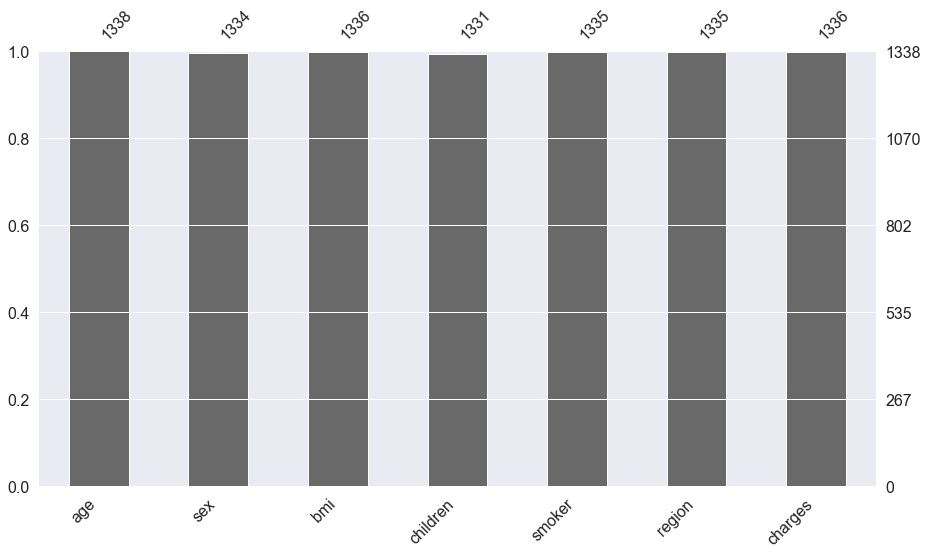

In [5]:
msno.bar(insurance, figsize = (15,8))
plt.show()

In [6]:
insurance.isnull().any()

age         False
sex          True
bmi          True
children     True
smoker       True
region       True
charges      True
dtype: bool

In [7]:
insurance.isnull().sum()

age         0
sex         4
bmi         2
children    7
smoker      3
region      3
charges     2
dtype: int64

In [8]:
insurance['sex'] = insurance['sex'].fillna(method='ffill')
insurance['region'] = insurance['region'].fillna(method='ffill')
insurance['children'] = insurance['children'].fillna(method='bfill')
insurance['smoker'] = insurance['smoker'].fillna(method='bfill')

In [9]:
bmi_mean = insurance['bmi'].mean()
charges_mean = insurance['charges'].mean()

insurance['bmi'] = insurance['bmi'].fillna(value=bmi_mean)
insurance['charges'] = insurance['charges'].fillna(value=charges_mean)

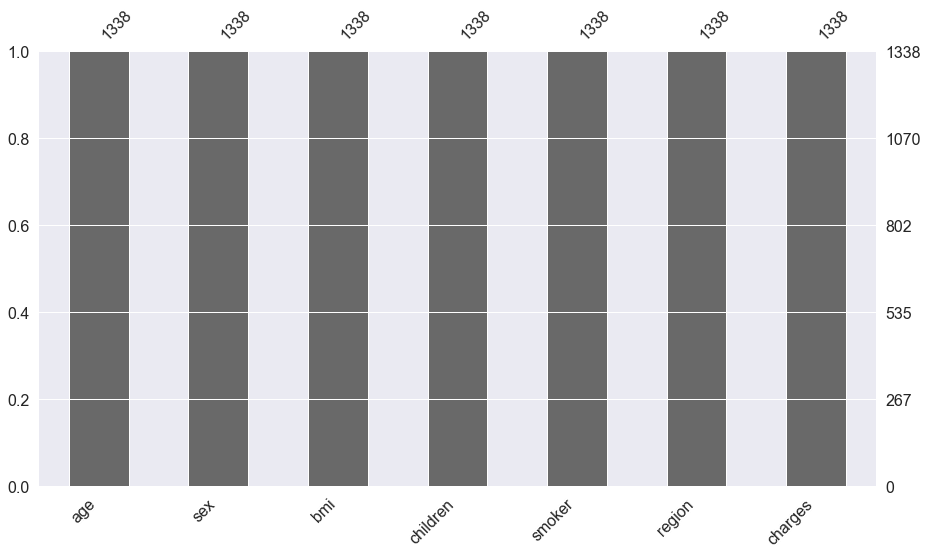

In [10]:
msno.bar(insurance, figsize = (15,8))
plt.show()

In [11]:
insurance['sex'] = insurance['sex'].apply(lambda x: 
                                         1 if x=='male' else 0)

insurance['smoker'] = insurance['smoker'].apply(lambda x: 
                                         1 if x=='yes' else 0)

le = LabelEncoder()
insurance['region'] = le.fit_transform(insurance.region)

insurance['children'] = insurance['children'].astype('int')

#region_get = pd.get_dummies(insurance.region)
#insurance['region'] = insurance['region'].astype('object')
#insurance['region'] = pd.to_numeric(insurance['region'], errors='coerce')

In [12]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


### After LabelEncoded
* northwest = 3
* northeast = 2
* southeast = 1
* southwest = 0

In [13]:
insurance.to_csv('clean_insurance_data.csv')

## $$Plotting$$

In [14]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
ins_data = pd.read_csv('clean_insurance_data.csv')
ins_data.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,3,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520


In [16]:
ins_data.drop('Unnamed: 0', axis=1,inplace=True)
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
ins_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505979,30.677526,1.086697,0.204783,1.516442,13287.851589
std,14.049960,0.500151,6.087187,1.180730,0.403694,1.105551,12101.623628
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.315000,0.000000,0.000000,1.000000,4748.057175
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9401.175500
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


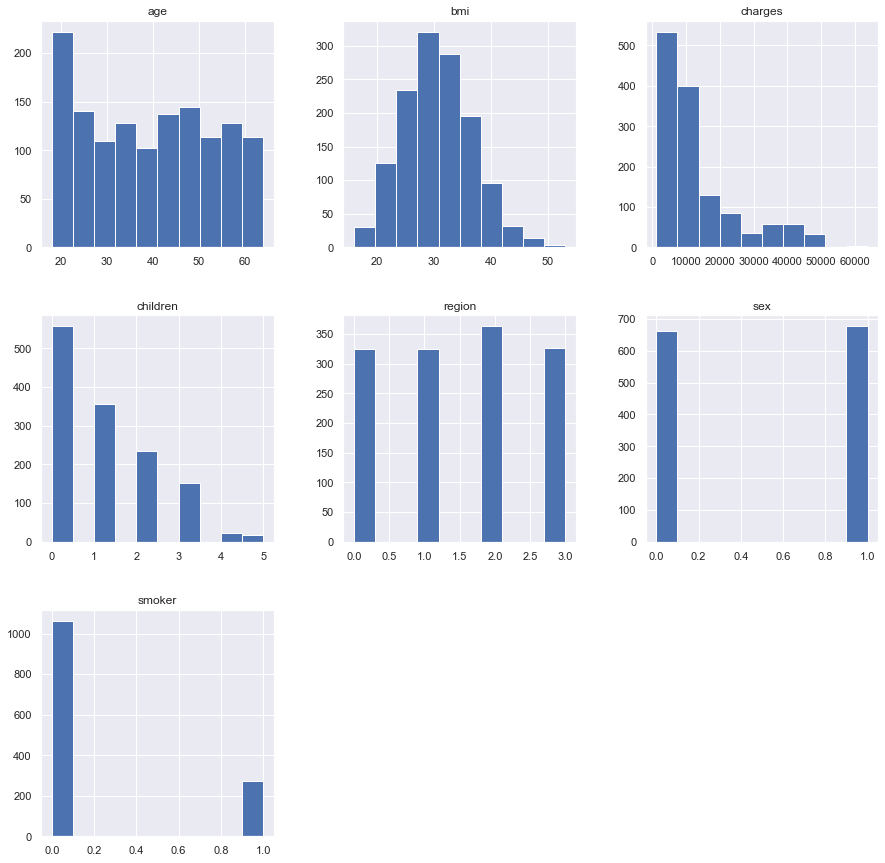

In [18]:
ins_data.hist(figsize=(15,15))
plt.show()

In [19]:
print(ins_data["sex"].value_counts())

1    677
0    661
Name: sex, dtype: int64


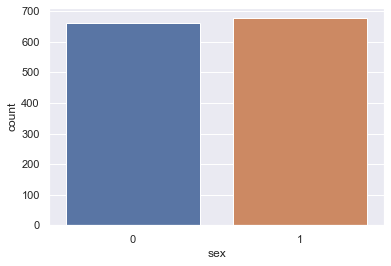

In [20]:
sns.countplot(x='sex', data=ins_data)
plt.show()

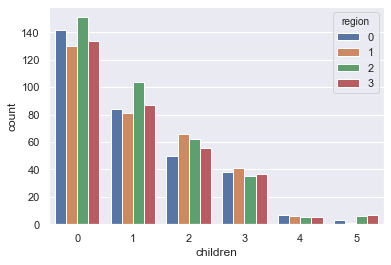

In [21]:
sns.countplot(x='children',hue='region', data=ins_data)
plt.show()

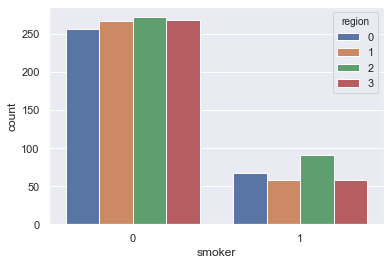

In [22]:
sns.countplot(x='smoker',hue='region', data=ins_data)
plt.show()

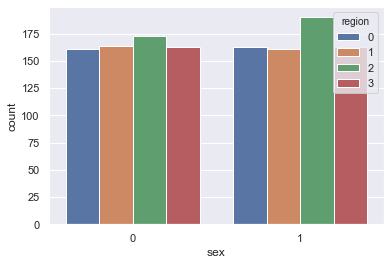

In [23]:
sns.countplot(x='sex',hue='region', data=ins_data)
plt.show()

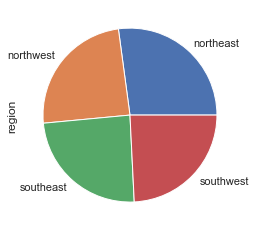

In [24]:
labels = 'northeast', 'northwest', 'southeast','southwest'
ins_data.region.value_counts().plot(kind="pie",labels = labels)
plt.show()

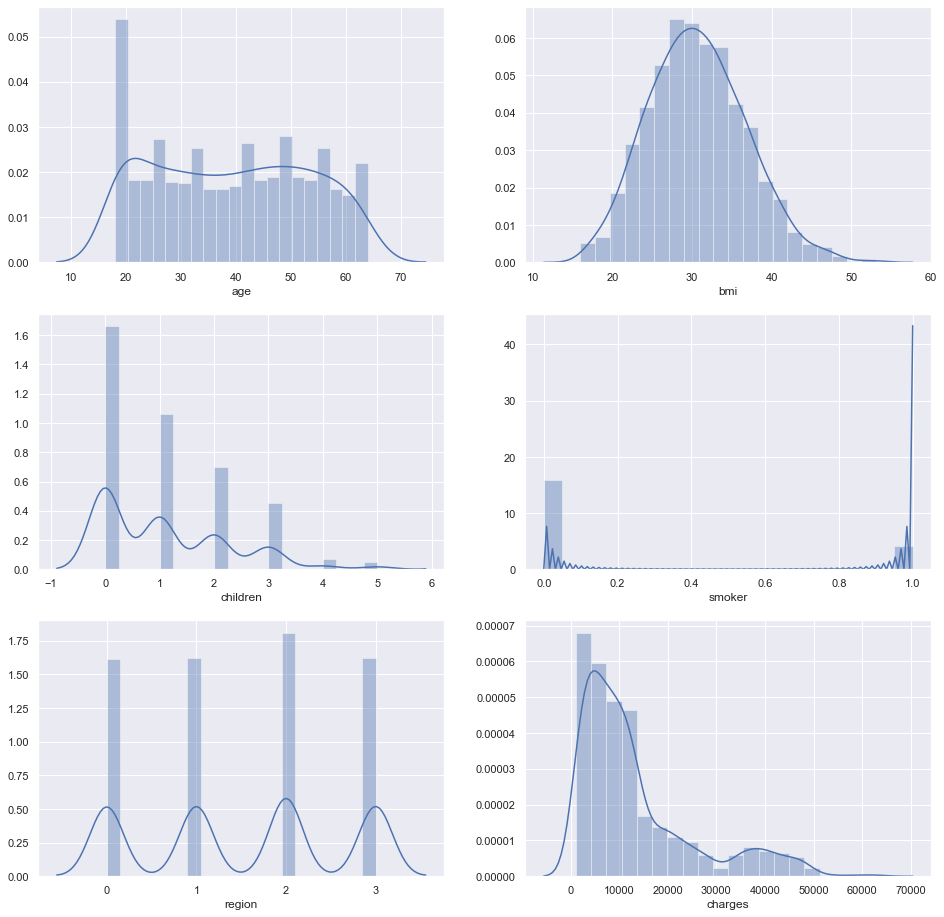

In [25]:
fig, ax = plt.subplots(3,2, figsize=(16,16))
sns.distplot(ins_data.age, bins = 20, ax=ax[0,0])  
sns.distplot(ins_data.bmi, bins = 20, ax=ax[0,1]) 
sns.distplot(ins_data.children, bins = 20, ax=ax[1,0]) 
sns.distplot(ins_data.smoker, bins = 20, ax=ax[1,1])
sns.distplot(ins_data.region, bins = 20, ax=ax[2,0])
sns.distplot(ins_data.charges, bins = 20, ax=ax[2,1]) 
plt.show()

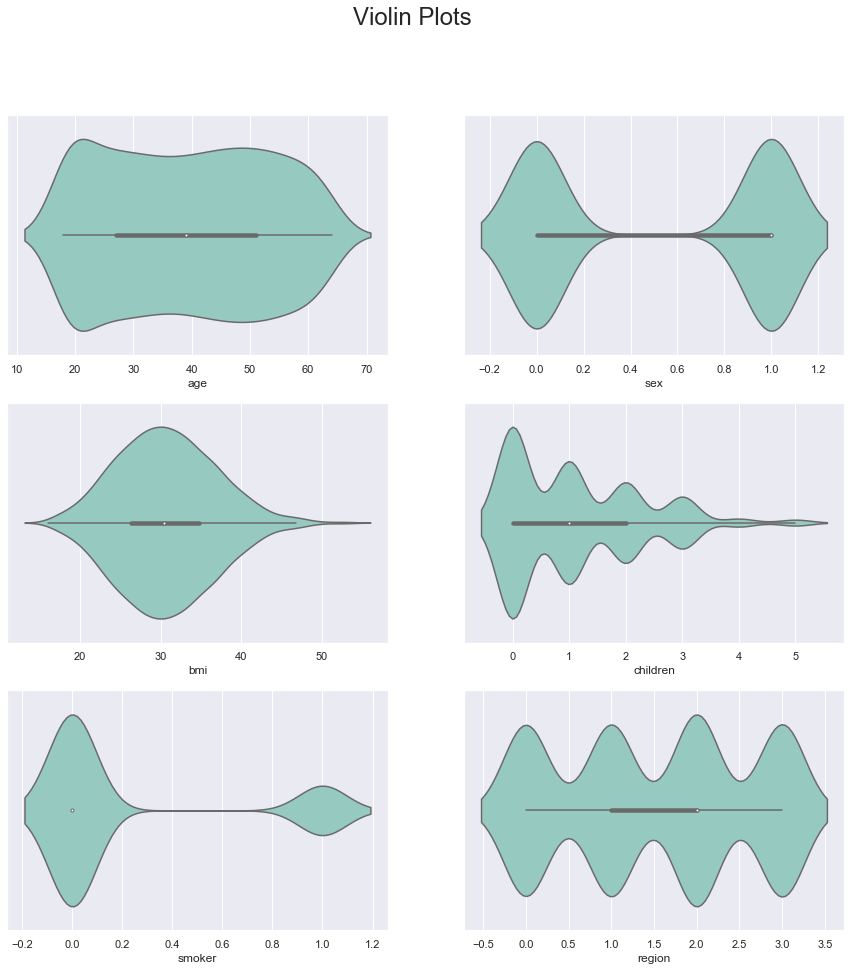

In [26]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="age", data=ins_data,ax=ax[0,0],palette='Set3')
sns.violinplot(x="sex", data=ins_data,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='bmi', data=ins_data, ax=ax[1,0], palette='Set3')
sns.violinplot(x='children', data=ins_data, ax=ax[1,1],palette='Set3')
sns.violinplot(x='smoker', data=ins_data, ax=ax[2,0], palette='Set3')
sns.violinplot(x='region', data=ins_data, ax=ax[2,1],palette='Set3')
plt.show()

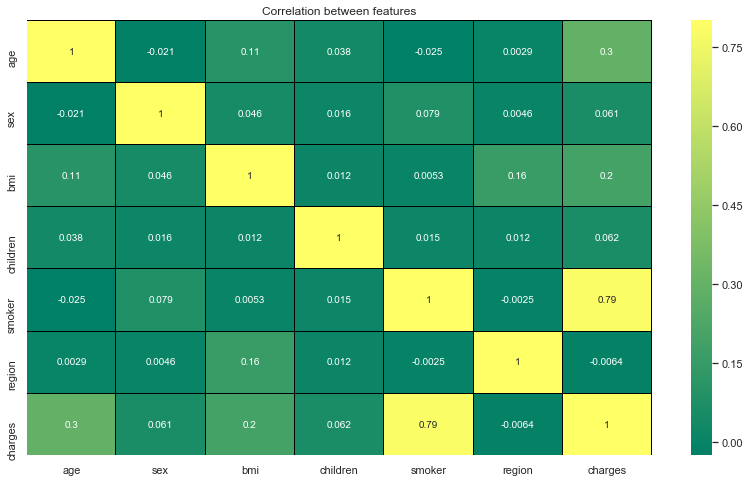

In [27]:
corr=ins_data.corr()

plt.figure(figsize=(14,8))

sns.heatmap(corr, vmax=.8, linewidths=0.01,annot=True,cmap='summer',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [28]:
#insurance['sex'] = insurance['sex'].astype('float')
#insurance['children'] = insurance['children'].astype('float')
#insurance['smoker'] = insurance['smoker'].astype('float')

## $$Regression$$ $$Tasks$$

In [29]:
X = ins_data.iloc[:,:-1].values
y = ins_data.iloc[:,6:].values

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
model.score(X_test,y_test)

0.7823263942179873

## $$Algorithm-Comparison$$

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
pipelines = []
pipelines.append(('LinearR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('LassoR', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ElasticNetR', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('KNeighborsR', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('DecisionTR', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('GradientBR', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('RandomFR', Pipeline([('Scaler', StandardScaler()),('Rand', RandomForestRegressor(n_estimators=100))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

LinearR: 0.727616 
LassoR: 0.727626 
ElasticNetR: 0.647485 
KNeighborsR: 0.795522 
DecisionTR: 0.678030 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

GradientBR: 0.837018 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

SVR: -0.097981 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

RandomFR: 0.817158 


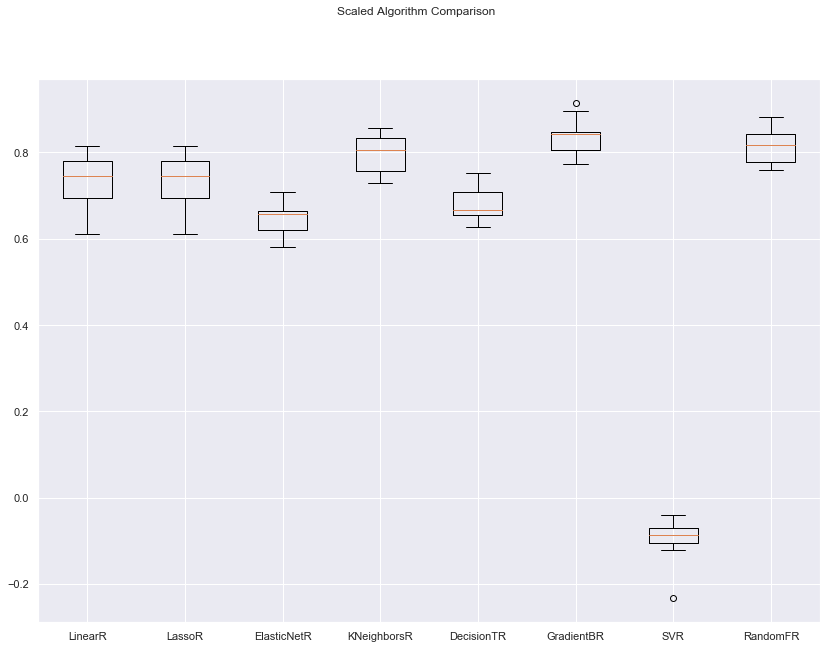

In [36]:
fig = plt.figure(figsize=(14,10))
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
gbt = GradientBoostingRegressor(n_estimators=200,max_depth=5, random_state=1)
gbt.fit(X_train,y_train)
gbt.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.840405492044337

## $$Tuning / Model Performance Metrics$$

In [38]:
from sklearn.model_selection import GridSearchCV
param_gbt ={
     'max_depth':[3,4,5,6],
     'min_samples_leaf':[0.04,0.06,0.08],
     'max_features':[0.2,0.4,0.6,0.8]
}

grid_gbt = GridSearchCV(estimator=gbt,
                        param_grid=param_gbt,
                        cv=10, 
                        n_jobs=-1)

grid_gbt.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200,
                                                 n_iter_no_change=None,
               

In [39]:
grid_gbt.score(X_test,y_test)

0.8750654070381102

In [40]:
param_gbt ={
     'n_estimators':[100,200,300,400],
     'max_depth':[3,4,5,6],
     'min_samples_leaf':[0.1,0.2],
     'max_features':['log2','sqrt','auto']
}

grid_gbt2 = GridSearchCV(estimator=gbt,
                         param_grid=param_gbt,
                         cv=10, 
                         n_jobs=-1)

grid_gbt2.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200,
                                                 n_ite...one,
                         

In [41]:
grid_gbt2.score(X_test,y_test)

0.8775043915968345

In [42]:
#from sklearn.preprocessing import StandardScaler
#x_sc = StandardScaler()
#y_sc = StandardScaler()

#x_scaled = x_sc.fit_transform(X_train)
#y_scaled = y_sc.fit_transform(y_train)

#X_test = x_sc.fit_transform(X_test)
#y_test = y_sc.fit_transform(y_test)

#grid_gbt2.fit(x_scaled,y_scaled)
#grid_gbt2.score(X_test,y_test)

In [43]:
x1 = float(input("Enter Your Age: "))
x2 = float(input("Enter Your Sex: "))
x3 = float(input("Enter Your BMI: "))
x4 = float(input("Enter Your Children Number: "))
x5 = float(input("Enter You Are Smoker=1 Or Not = 0: "))
x6 = float(input("Enter Your Place: "))

x7 = [x1,x2,x3,x4,x5,x6]

predict = grid_gbt2.predict([x7])

print(" ")

print("Your Annual Medical Insurance Cost Near $",predict)

Enter Your Age: 22
Enter Your Sex: 1
Enter Your BMI: 26
Enter Your Children Number: 0
Enter You Are Smoker=1 Or Not = 0: 0
Enter Your Place: 2
 
Your Annual Medical Insurance Cost Near $ [2358.33422478]
